In [2]:
import argparse
import sys
import os
import json
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
from collections import Counter

/Users/katemarg/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
BASE_DIR = "/Users/katemarg/PycharmProjects/temporal_robustness_evaluation"
DATA_DIR = os.path.join(BASE_DIR, 'data')
RES_DIR = os.path.join(BASE_DIR, 'new_results')
LOG_DIR = os.path.join(BASE_DIR, 'new_logs')
CACHE_DIR = os.path.join(BASE_DIR, 'cached')
SINGLE_TOK_RES_DIR = os.path.join(RES_DIR, 'single_token')
FOT_RES_DIR = os.path.join(SINGLE_TOK_RES_DIR, 'facts_over_time')

models = [
            'cardiffnlp/twitter-roberta-base-2019-90m',
            'cardiffnlp/twitter-roberta-base-mar2020',
            'cardiffnlp/twitter-roberta-base-jun2020',
            'cardiffnlp/twitter-roberta-base-sep2020',
            'cardiffnlp/twitter-roberta-base-dec2020',
            'cardiffnlp/twitter-roberta-base-mar2021',
            'cardiffnlp/twitter-roberta-base-jun2021',
            'cardiffnlp/twitter-roberta-base-sep2021',
            'cardiffnlp/twitter-roberta-base-dec2021',
            # 'cardiffnlp/twitter-roberta-base-2021-124m',
            'cardiffnlp/twitter-roberta-base-mar2022',
            'cardiffnlp/twitter-roberta-base-jun2022'
        ]

df = pd.DataFrame()
for model_name in models:
    filename = 'full_results_{}_facts_over_time_single_token.csv'.format(model_name.split('-')[-1])
    filepath = os.path.join(FOT_RES_DIR, filename)
    _df = pd.read_csv(filepath)
    
    df = df.append(_df, ignore_index=True)

/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_7775/319598504.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df, ignore_index=True)
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_7775/319598504.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df, ignore_index=True)
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_7775/319598504.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df, ignore_index=True)
/var/folders/k7/bmn9n_v5383b9njft4lk4w8c0000gr/T/ipykernel_7775/319598504.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df,

In [4]:
df['model'] = df['model'].apply(lambda x: x.split('-')[-1])
df.loc[df['model'] == "90m", 'model'] = "2019-Q4"
df.loc[df['model'] == "mar2020", 'model'] = "2020-Q1"
df.loc[df['model'] == "jun2020", 'model'] = "2020-Q2"
df.loc[df['model'] == "sep2020", 'model'] = "2020-Q3"
df.loc[df['model'] == "dec2020", 'model'] = "2020-Q4"
df.loc[df['model'] == "mar2021", 'model'] = "2021-Q1"
df.loc[df['model'] == "jun2021", 'model'] = "2021-Q2"
df.loc[df['model'] == "sep2021", 'model'] = "2021-Q3"
df.loc[df['model'] == "dec2021", 'model'] = "2021-Q4"
df.loc[df['model'] == "mar2022", 'model'] = "2022-Q1"
df.loc[df['model'] == "jun2022", 'model'] = "2022-Q2"

In [5]:
# df['p@100_list']

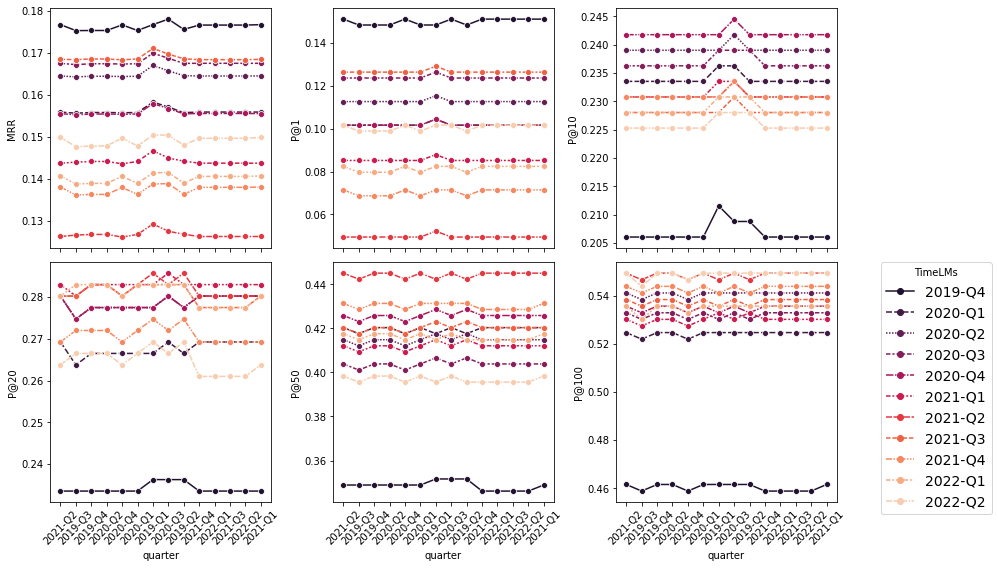

In [9]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 4), sharey=True)
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 4), sharex=True)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(14, 8), sharex=True)
# 1. MRR
sns.lineplot(
    data=df,
    x="quarter", 
    y="mrr_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ax=ax1,
    ci=None,
    legend=False
)
ax1.set_ylabel("MRR")
ax1.tick_params(axis='x', rotation=45)
# 2. P@1
sns.lineplot(
    data=df,
    x="quarter", 
    y="p@1_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ax=ax2,
    ci=None,
    legend=False
)
ax2.set_ylabel("P@1")
ax2.tick_params(axis='x', rotation=45)
# 3. P@10
sns.lineplot(
    data=df,
    x="quarter", 
    y="p@10_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ci=None,
        legend=False,
    ax=ax3
)
ax3.set_ylabel("P@10")
ax3.tick_params(axis='x', rotation=45)
# 4. P@20
sns.lineplot(
    data=df,
    x="quarter", 
    y="p@20_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ci=None,
        legend=False,
    ax=ax4
)
ax4.set_ylabel("P@20")
ax4.tick_params(axis='x', rotation=45)
# 5. P@50
sns.lineplot(
    data=df,
    x="quarter", 
    y="p@50_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ci=None,
        legend=False,
    ax=ax5
)
ax5.set_ylabel("P@50")
ax5.tick_params(axis='x', rotation=45)
# 6. P@100
sns.lineplot(
    data=df,
    x="quarter", 
    y="p@100_list",
    hue="model", 
    style="model", 
    palette=sns.color_palette('rocket', n_colors=11),
    markers=["o"]*11,
    ci=None,
    ax=ax6
)
ax6.set_ylabel("P@100")
ax6.tick_params(axis='x', rotation=45)
ax6.legend(bbox_to_anchor=(1.2, 1), loc='best', borderaxespad=0, title='TimeLMs', prop={'size': 14})

plt.rcParams.update({'font.size': 10})

fig.tight_layout()
plt.savefig('plots/facts_over_time_single_token.png', bbox_inches = 'tight', dpi=500)

In [89]:
df[df["model"]=='2019-Q4']

,text,relation,gold_label,pred_label,model,quarter,mrr_list,p@1_list,ranking_position_list,p@10_list,p@20_list,p@50_list,p@100_list
0,Lewis Hamilton plays for <mask>.,P54,[' Mercedes'],Hamilton,2019-Q4,2021-Q2,0.166667,0,6,1,1,1,1
1,Lewis Hamilton plays for <mask>.,P54,[' Mercedes'],Hamilton,2019-Q4,2019-Q3,0.166667,0,6,1,1,1,1
2,Lewis Hamilton plays for <mask>.,P54,[' Mercedes'],Hamilton,2019-Q4,2019-Q4,0.166667,0,6,1,1,1,1
3,Lewis Hamilton plays for <mask>.,P54,[' Mercedes'],Hamilton,2019-Q4,2020-Q2,0.166667,0,6,1,1,1,1
4,Lewis Hamilton plays for <mask>.,P54,[' Mercedes'],Hamilton,2019-Q4,2020-Q4,0.166667,0,6,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,International Bobsleigh and Skeleton Federatio...,P1412,[' German'],English,2019-Q4,2021-Q4,0.250000,0,4,1,1,1,1
5092,International Bobsleigh and Skeleton Federatio...,P1412,[' German'],English,2019-Q4,2022-Q1,0.250000,0,4,1,1,1,1
5093,International Bobsleigh and Skeleton Federatio...,P1412,[' German'],English,2019-Q4,2021-Q3,0.250000,0,4,1,1,1,1
5094,International Bobsleigh and Skeleton Federatio...,P1412,[' German'],English,2019-Q4,2022-Q2,0.250000,0,4,1,1,1,1


In [13]:
model_name='cardiffnlp/twitter-roberta-base-2019-90m'

In [15]:
model_name.split("/")[-1]

'twitter-roberta-base-2019-90m'

(<Figure size 1008x288 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

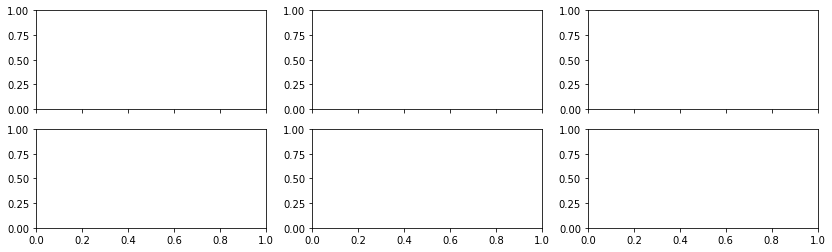

In [60]:
plt.subplots(2,3, figsize=(14, 4), sharex=True)

## This visualises the average performance (y axis) of all models (x axis) in all test data between 2019 and 2022.

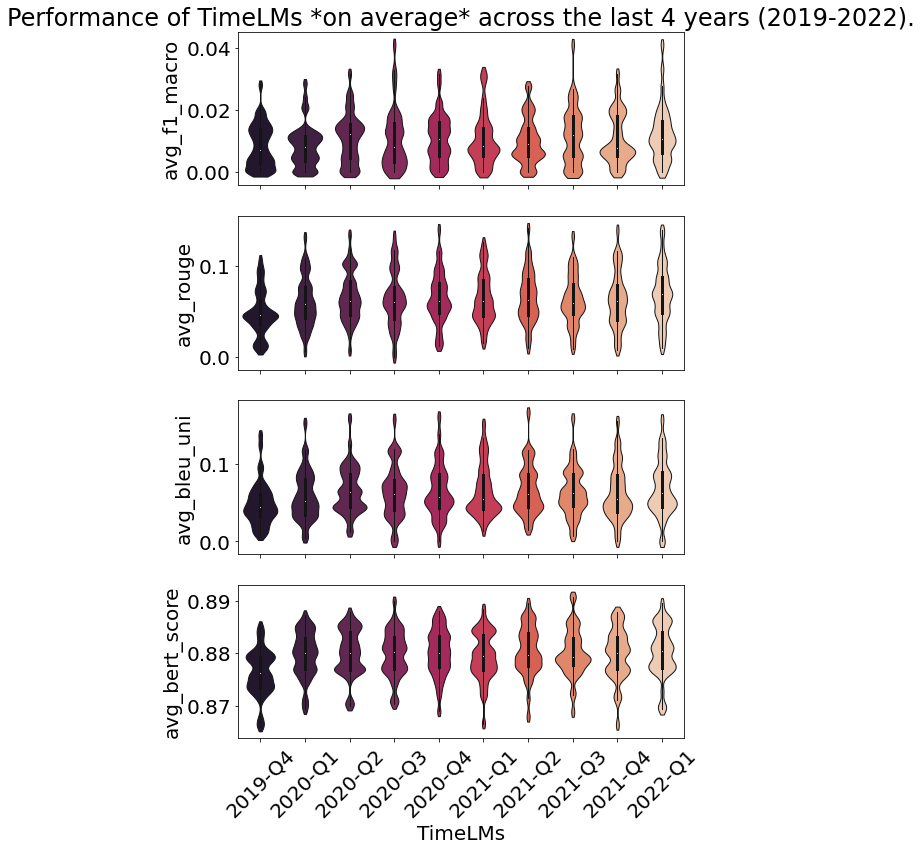

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(8, 13), sharex=True)
# sns.set_theme(style="ticks")
sns.violinplot(data=results_df, y='avg_f1_macro', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax0)
sns.violinplot(data=results_df, y='avg_rouge', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax1)
sns.violinplot(data=results_df, y='avg_bleu_uni', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax2)
sns.violinplot(data=results_df, y='avg_bert_score', x='model',palette="rocket", bw=.2, cut=1, linewidth=1, ax=ax3)
plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("TimeLMs")
ax0.set_title('Performance of TimeLMs *on average* across the last 4 years (2019-2022).')
plt.savefig('plots/Results_avg_last4years_quarter_multi_token.png', bbox_inches = 'tight', dpi=500)

## We can also explore the logs and predictions for every model in every split individually. For example:

In [17]:
split = "updated"
model = "twitter-roberta-base-2019-90m"
seed = 42
N = 100
M = 5
topk = 20

In [18]:
full_log_filename = "full_results_{}_2020-Q2_{}_{}_{}_{}.pt".format(model, split, N, M, seed)

In [19]:
# for full log open
ddict = torch.load(os.path.join(RES_DIR, full_log_filename))
columns = ['text', 'gold_label', 
           'gold_num_masks', 'relation', 
           'num_answers', 'f1_micro', 'f1_macro', 'rouge', 
#            'bleu', 'bleu_uni_precision', 
           'bert_score', 
           'best_log_probs', 
           'best_pred_tokens', 
           'best_pred_strings']
dddict = {key: ddict[key] for key in columns}

In [21]:
df = pd.DataFrame(data=dddict)

In [22]:
df

,text,gold_label,gold_num_masks,relation,num_answers,f1_micro,f1_macro,rouge,bert_score,best_log_probs,best_pred_tokens,best_pred_strings
0,Andre Iguodala plays for <mask> <mask>.,[ Miami Heat],2,P54,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.9150390028953552, 0.9190067052841187, 0.875...","[9.315415382385254, 10.234005451202393, 7.2221...","[[3426], [5, 6772], [1731, 3245, 122], [162, 9...","[ Liverpool, the Lakers, Barca now, me so d..."
1,Miroslav Lajčák holds the position of <mask> <...,[ European Union Special Representative],4,P39,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8248672485351562, 0.8572892546653748, 0.864...","[9.424880981445312, 7.775924205780029, 9.62523...","[[394], [5, 394], [1231, 9, 5721], [5, 1993, 2...","[ president, the president, Chief of Staff, ..."
2,Matt Carthy holds the position of <mask> <mask...,[ Teachta Dála],5,P39,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.7966454029083252, 0.8296538591384888, 0.820...","[8.447942733764648, 7.612443208694458, 7.56116...","[[394], [5, 183], [10, 140, 9906], [10, 1172, ...","[ president, the day, a Trump supporter, a ..."
3,Olav Fykse Tveit holds the position of <mask> ...,[ Preses],2,P39,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8489119410514832, 0.8570877909660339, 0.849...","[8.323836326599121, 8.354332208633423, 6.36577...","[[394], [5, 270], [275, 165, 869], [270, 9, 5,...","[ president, the President, best team player..."
4,Reshma Kewalramani holds the position of <mask...,[ chief executive officer],3,P39,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8934906125068665, 0.8537933230400085, 0.891...","[7.977327346801758, 7.379817247390747, 7.03336...","[[394], [5, 183], [5, 92, 2784], [5, 270, 11, ...","[ president, the day, the new PM, the Presi..."
5,Norma Foley holds the position of <mask> <mask...,[ Minister for Education and Skills],5,P39,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8403588533401489, 0.8525987863540649, 0.861...","[6.989991664886475, 7.97197699546814, 7.968808...","[[394], [275, 3390], [5, 275, 3390], [10, 693,...","[ president, best actress, the best actress,..."
6,Uffe Elbæk is a member of the <mask> <mask>.,[ Independent Greens],2,P102,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8135427236557007, 0.8396816253662109, 0.845...","[8.334210395812988, 9.871150732040405, 3.59964...","[[950], [315, 532], [274, 4791, 435], [384, 12...","[ club, United States, Fae community, O-Lin..."
7,Hwang Kyo-ahn is a member of the <mask> <mask>...,[ People Power Party],3,P102,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8602454662322998, 0.877741277217865, 0.8578...","[9.731480598449707, 6.828942894935608, 3.53551...","[[333], [92, 333], [333, 229, 6576], [163, 12,...","[ group, new group, group Kook, B-Team grou..."
8,Rasmus Nordqvist is a member of the <mask> <ma...,[ Green Left],2,P102,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.8759491443634033, 0.8771491050720215, 0.865...","[8.121084213256836, 9.412031650543213, 9.17152...","[[165], [1083, 168], [496, 2010, 2711], [787, ...","[ team, Russian government, National Securit..."
9,Niko Grünfeld is a member of the <mask> <mask>.,[ Independent Greens],2,P102,1,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.854084312915802, 0.8504831790924072, 0.8340...","[8.163363456726074, 8.665356636047363, 10.5685...","[[15090], [140, 942], [188, 469, 1513], [496, ...","[ NRA, Trump administration, New York Times,..."
